In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_maha\data\Fish.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.shape

(159, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [9]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

print("Species classes:", le.classes_)

Species classes: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
df = df.drop(columns=["Length1", "Length2"])

In [12]:
X = df.drop("Weight", axis=1)
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#### Task 2: Exploratory Data Analysis and Feature Engineering

##### Histograms (Distribution of Features)

In [13]:
num_cols = ["Weight", "Length3", "Height", "Width"]

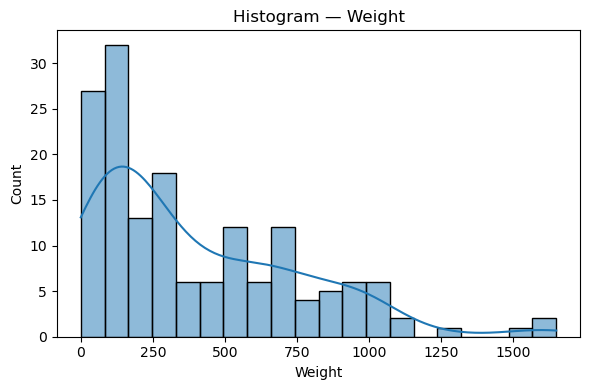

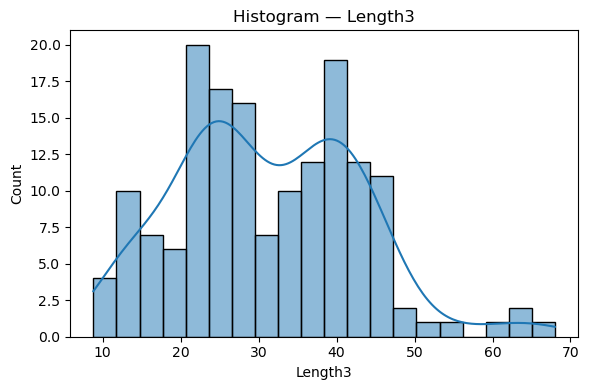

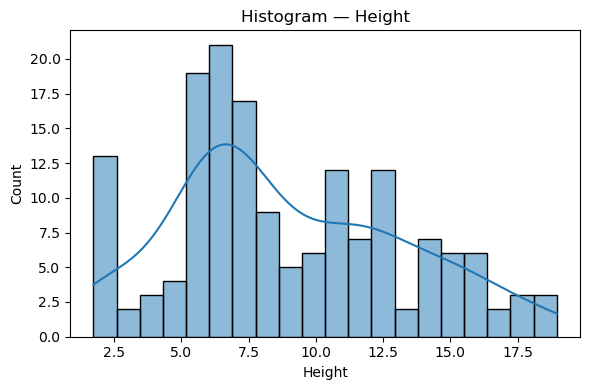

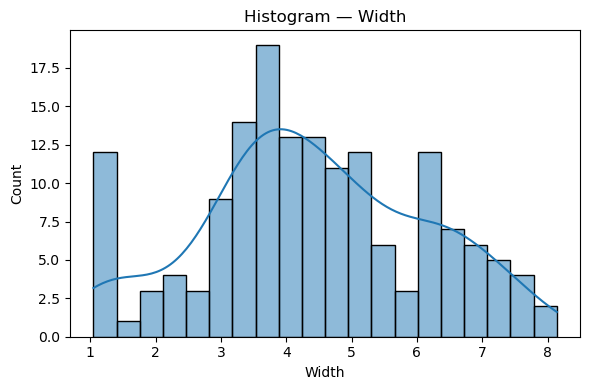

In [14]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

##### Boxplots (Outliers)

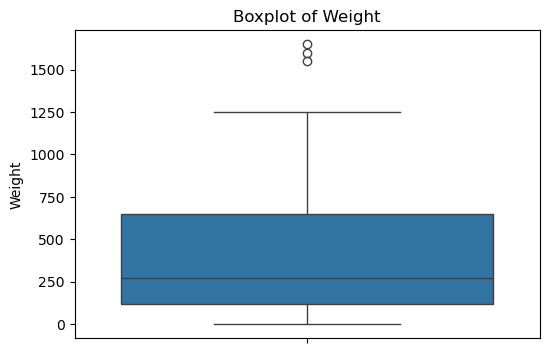

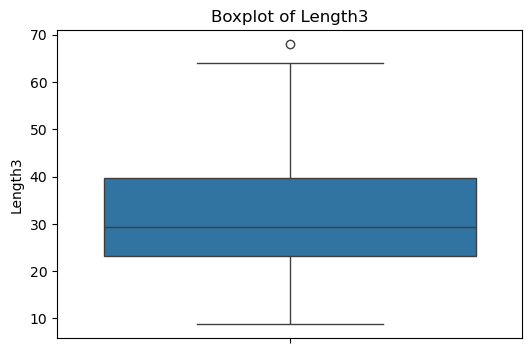

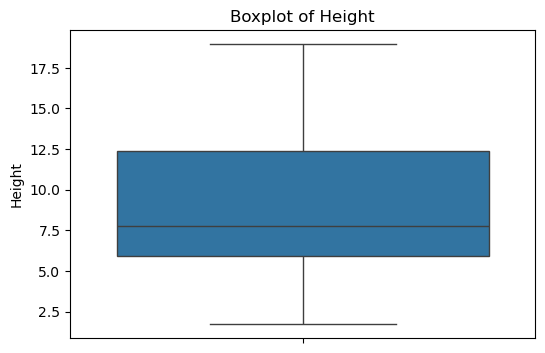

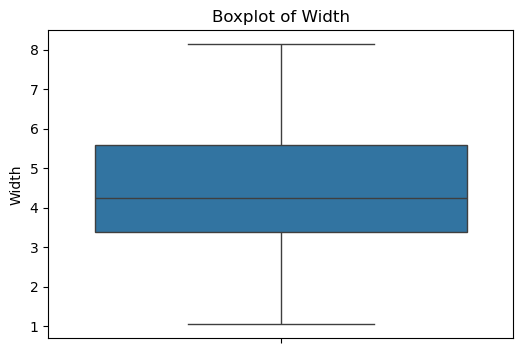

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

##### Scatter Plots vs Target (Weight)

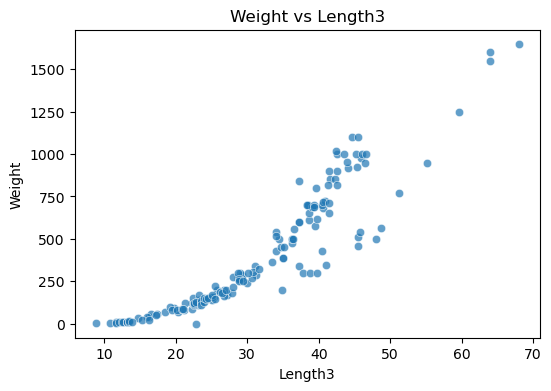

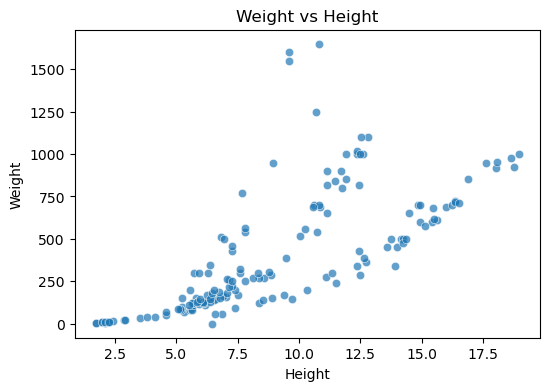

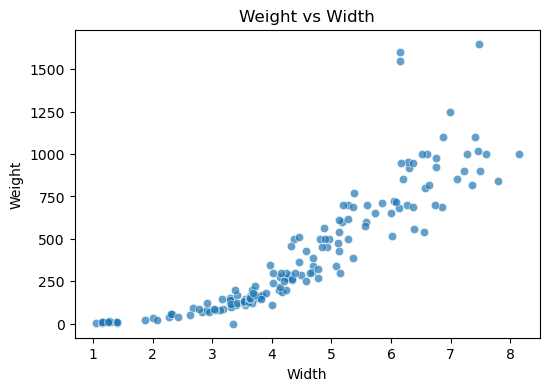

In [16]:
num_cols = ["Length3", "Height", "Width"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Weight"], alpha=0.7)
    plt.title(f"Weight vs {col}")
    plt.xlabel(col)

##### Correlation Heatmap

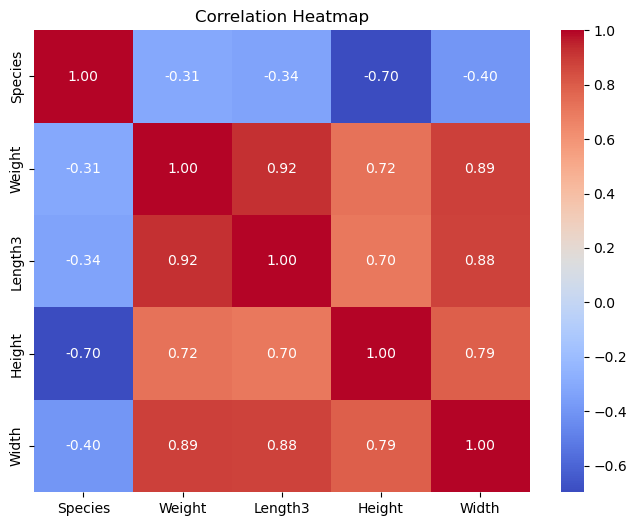

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### Handle Outliers

In [18]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.clip(df[col], lower, upper)

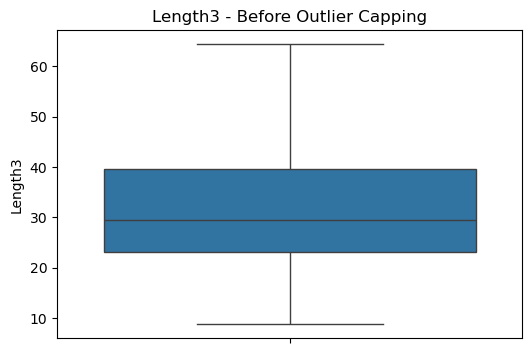

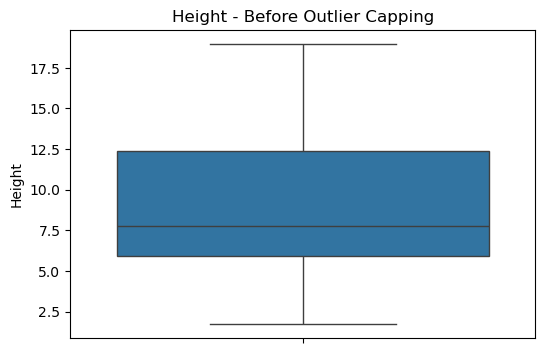

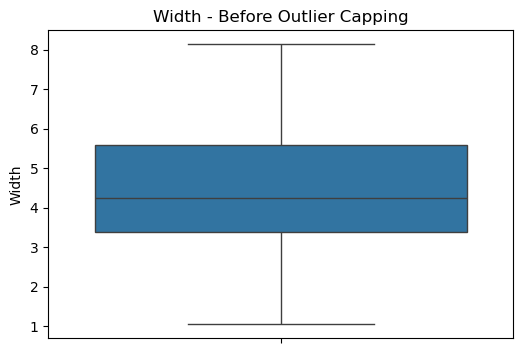

In [19]:
for col in num_cols:
    if col == "Weight": 
        continue
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"{col} - Before Outlier Capping")
    plt.ylabel(col)
    plt.show()

In [20]:
df["Vol_approx"] = df["Length3"] * df["Height"] * df["Width"]

#### Task 3: Model Development and Comparison

In [21]:
X = df.drop(columns=["Weight"])
y = df["Weight"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (127, 5) | Test shape: (32, 5)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
results = {}

##### Linear Regression (baseline)

In [26]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_lin = linreg.predict(X_test_scaled)
results["Linear Regression"] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    "R²": r2_score(y_test, y_pred_lin)
}

##### Ridge Regression 

In [27]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results["Ridge Regression"] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    "R²": r2_score(y_test, y_pred_ridge)
}

##### Lasso Regression

In [28]:
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results["Lasso Regression"] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    "R²": r2_score(y_test, y_pred_lasso)
}

##### Polynomial Regression

In [29]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
results["Polynomial Regression (deg=2)"] = {
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_poly)),
    "R²": r2_score(y_test, y_pred_poly)
}

In [30]:
results_df = pd.DataFrame(results).T
results_df

,RMSE,R²
Linear Regression,65.090159,0.970214
Ridge Regression,61.395951,0.973499
Lasso Regression,65.045570,0.970255
Polynomial Regression (deg=2),57.928626,0.976408


In [31]:
df.shape

(159, 6)

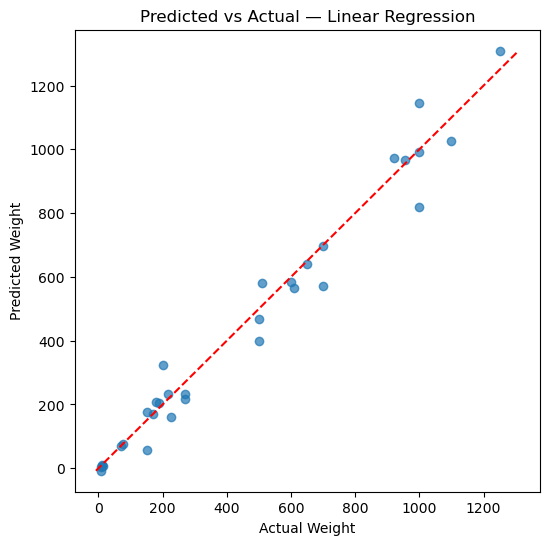

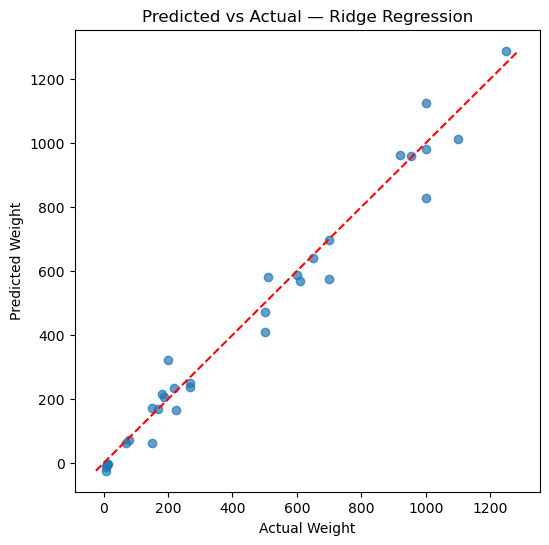

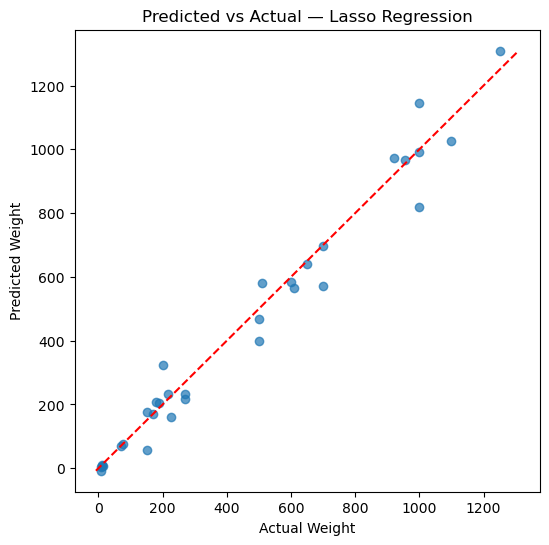

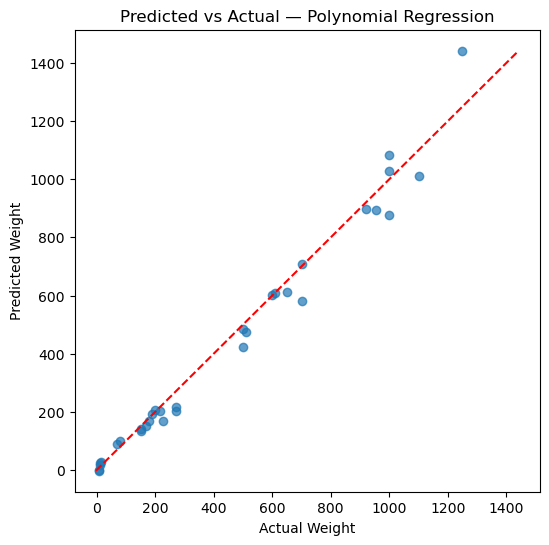

In [32]:
predictions = {
    "Linear Regression": y_pred_lin,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,
    "Polynomial Regression": y_pred_poly
}

for name, y_pred in predictions.items():
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    minv, maxv = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
    plt.plot([minv, maxv], [minv, maxv], 'r--')
    plt.title(f"Predicted vs Actual — {name}")
    plt.xlabel("Actual Weight")
    plt.ylabel("Predicted Weight")
    plt.show()

In [33]:
feature_names = X.columns  

# Linear Regression
lin_intercept = linreg.intercept_
lin_coefs = pd.Series(linreg.coef_, index=feature_names)

print("Linear Regression")
print("Intercept:", lin_intercept)
print("Coefficients:")
print(lin_coefs, "\n")

# Ridge Regression
ridge_intercept = ridge.intercept_
ridge_coefs = pd.Series(ridge.coef_, index=feature_names)

print("Ridge Regression")
print("Intercept:", ridge_intercept)
print("Coefficients:")
print(ridge_coefs, "\n")

# Lasso Regression
lasso_intercept = lasso.intercept_
lasso_coefs = pd.Series(lasso.coef_, index=feature_names)

print("Lasso Regression")
print("Intercept:", lasso_intercept)
print("Coefficients:")
print(lasso_coefs, "\n")


Linear Regression
Intercept: 386.79448818897623
Coefficients:
Species        -8.762657
Length3       140.562142
Height       -147.849134
Width          18.940795
Vol_approx    312.754583
dtype: float64 

Ridge Regression
Intercept: 386.79448818897623
Coefficients:
Species        -3.092654
Length3       143.236401
Height       -127.374008
Width          25.088645
Vol_approx    287.419127
dtype: float64 

Lasso Regression
Intercept: 386.79448818897623
Coefficients:
Species        -8.688717
Length3       140.580667
Height       -147.669295
Width          18.912338
Vol_approx    312.630736
dtype: float64 



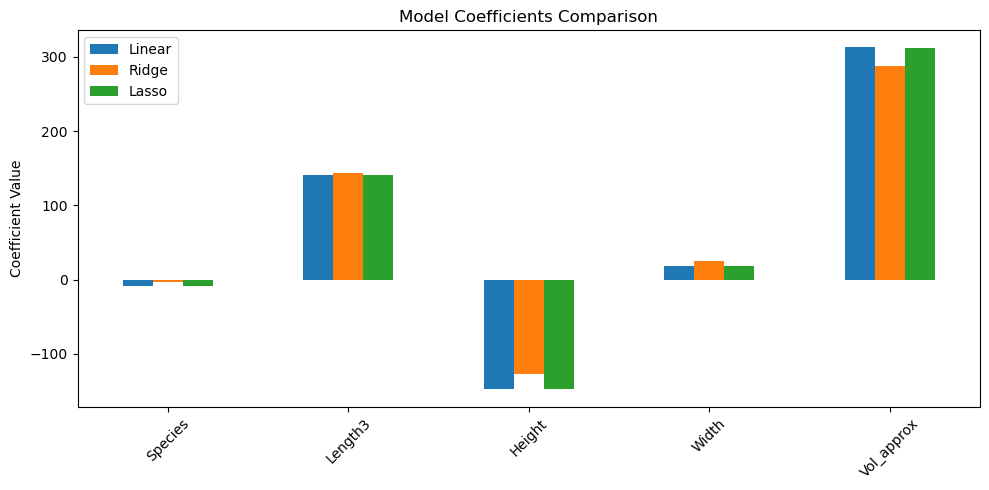

Intercepts:
Linear: 386.79
Ridge: 386.79
Lasso: 386.79


In [34]:
coefs_df = pd.DataFrame({
    "Linear": linreg.coef_,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_
}, index=feature_names)

coefs_df.plot(kind="bar", figsize=(10,5))
plt.title("Model Coefficients Comparison")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Intercepts:")
print(f"Linear: {lin_intercept:.2f}")
print(f"Ridge: {ridge_intercept:.2f}")
print(f"Lasso: {lasso_intercept:.2f}")